In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('./simulation_performance_summary.csv')

In [20]:
df.head()

,Algorithm,Params,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,Timestamp,Seed,TotalSimTime,NumInitialObstacles,AgentSpeed,LiDAR_Range,PaddingCells
0,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",3D_IOU,15,9,37,0.625,0.288,0.395,52,24,2025-05-22 12:32:43,5,20.0,60,20,30,1
1,HDBSCAN,"{'min_cluster_size': 5, 'min_samples': None, '...",3D_IOU,11,18,41,0.379,0.212,0.272,52,29,2025-05-22 12:32:43,5,20.0,60,20,30,1
2,KMEANS,"{'n_clusters': 52, 'random_state': 5, 'n_init'...",3D_IOU,10,30,42,0.250,0.192,0.217,52,40,2025-05-22 12:32:43,5,20.0,60,20,30,1
3,GMM,"{'n_components': 52, 'covariance_type': 'full'...",3D_IOU,12,22,40,0.353,0.231,0.279,52,34,2025-05-22 12:32:43,5,20.0,60,20,30,1
4,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",2D_CENTER_IN_GT_AREA,23,1,29,0.958,0.442,0.605,52,24,2025-05-22 12:32:43,5,20.0,60,20,30,1


In [21]:
df1 = df[['Algorithm','EvaluationMethod','TP','FP','FN','Precision','Recall','F1-Score','GT_Relevant','Predicted_Boxes']]

In [22]:
df1

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
0,DBSCAN,3D_IOU,15,9,37,0.625,0.288,0.395,52,24
1,HDBSCAN,3D_IOU,11,18,41,0.379,0.212,0.272,52,29
2,KMEANS,3D_IOU,10,30,42,0.250,0.192,0.217,52,40
3,GMM,3D_IOU,12,22,40,0.353,0.231,0.279,52,34
4,DBSCAN,2D_CENTER_IN_GT_AREA,23,1,29,0.958,0.442,0.605,52,24
...,...,...,...,...,...,...,...,...,...,...
331,GMM,2D_CENTER_IN_GT_AREA,33,10,27,0.767,0.550,0.641,60,43
332,DBSCAN,2D_AREA_OVERLAP_RATIO,34,2,26,0.944,0.567,0.708,60,36
333,HDBSCAN,2D_AREA_OVERLAP_RATIO,31,7,29,0.816,0.517,0.633,60,38
334,KMEANS,2D_AREA_OVERLAP_RATIO,40,14,20,0.741,0.667,0.702,60,54


In [23]:
performance_summary = df.groupby('EvaluationMethod').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).sort_values(by='Avg_F1_Score', ascending=False) # F1-Score 기준으로 정렬 (다른 기준으로 변경 가능)

print("--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---")
print(performance_summary)
print("\n")

--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---
                       Avg_F1_Score  Avg_Precision  Avg_Recall
EvaluationMethod                                              
2D_AREA_OVERLAP_RATIO      0.640357       0.816330    0.534723
2D_CENTER_IN_GT_AREA       0.639241       0.816411    0.532884
3D_IOU                     0.256554       0.329830    0.212741




In [24]:
display(performance_summary)

# 2D_AREA_OVERLAP_RATIO가 정확히 나와.

,Avg_F1_Score,Avg_Precision,Avg_Recall
EvaluationMethod,,,
2D_AREA_OVERLAP_RATIO,0.640357,0.816330,0.534723
2D_CENTER_IN_GT_AREA,0.639241,0.816411,0.532884
3D_IOU,0.256554,0.329830,0.212741


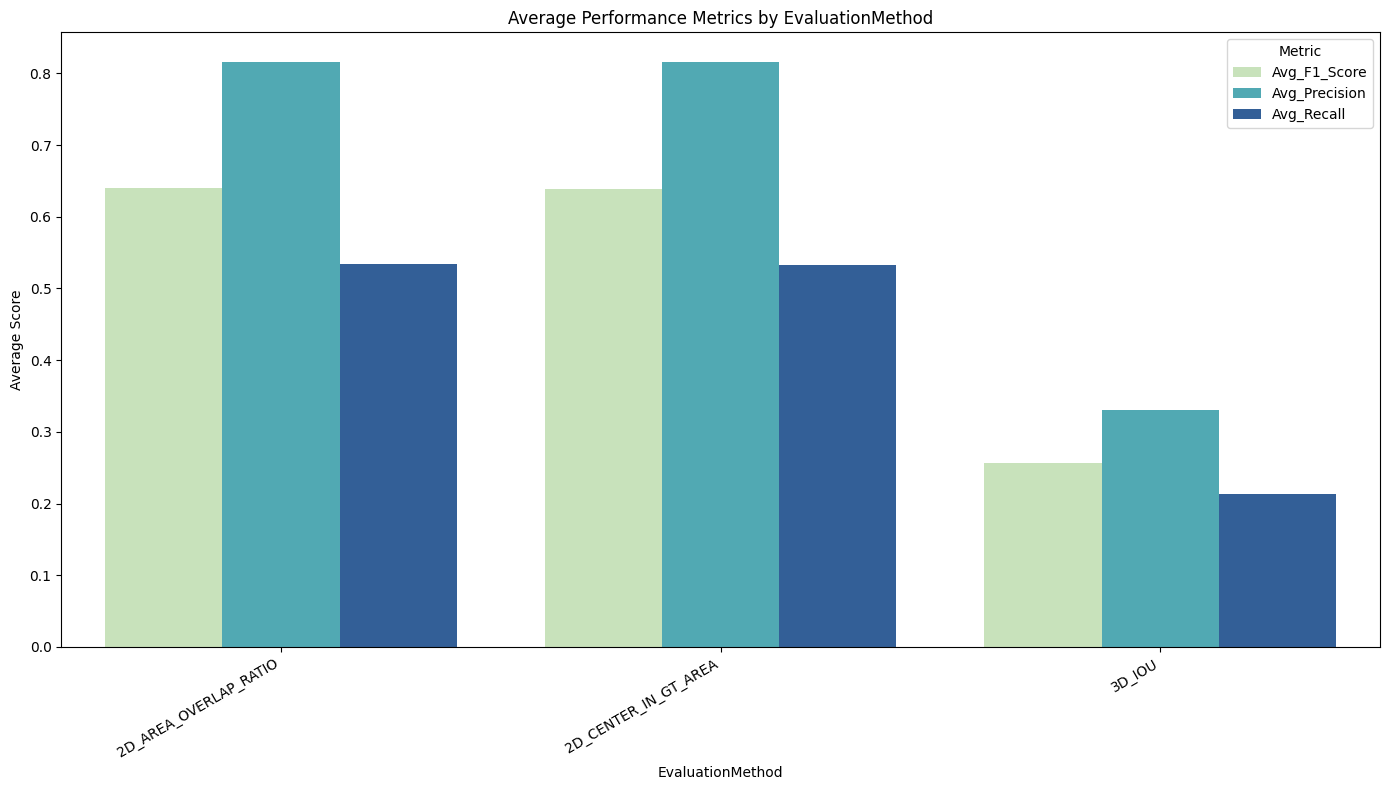

In [25]:
# 시각화를 위해 데이터프레임 형태를 살짝 변경 (melt 사용)
performance_summary_reset = performance_summary.reset_index() # EvaluationMethod를 컬럼으로 변경
performance_melted = performance_summary_reset.melt(
    id_vars='EvaluationMethod', # 기준이 될 컬럼
    value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'], # 값으로 사용할 컬럼들
    var_name='Metric', # 새로운 컬럼명 (지표 종류)
    value_name='Score'  # 새로운 컬럼명 (지표 값)
)

plt.figure(figsize=(14, 8))
sns.barplot(x='EvaluationMethod', y='Score', hue='Metric', data=performance_melted, palette='YlGnBu',
            order=performance_summary.index) # 정렬 순서 유지
plt.title('Average Performance Metrics by EvaluationMethod')
plt.xlabel('EvaluationMethod')
plt.ylabel('Average Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [26]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df1[df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()

In [27]:
df_target_method

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
8,DBSCAN,2D_AREA_OVERLAP_RATIO,24,0,28,1.000,0.462,0.632,52,24
9,HDBSCAN,2D_AREA_OVERLAP_RATIO,24,5,28,0.828,0.462,0.593,52,29
10,KMEANS,2D_AREA_OVERLAP_RATIO,29,11,23,0.725,0.558,0.630,52,40
11,GMM,2D_AREA_OVERLAP_RATIO,28,6,24,0.824,0.538,0.651,52,34
20,DBSCAN,2D_AREA_OVERLAP_RATIO,34,5,25,0.872,0.576,0.694,59,39
...,...,...,...,...,...,...,...,...,...,...
323,GMM,2D_AREA_OVERLAP_RATIO,43,7,17,0.860,0.717,0.782,60,50
332,DBSCAN,2D_AREA_OVERLAP_RATIO,34,2,26,0.944,0.567,0.708,60,36
333,HDBSCAN,2D_AREA_OVERLAP_RATIO,31,7,29,0.816,0.517,0.633,60,38
334,KMEANS,2D_AREA_OVERLAP_RATIO,40,14,20,0.741,0.667,0.702,60,54


In [28]:
df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes
8,DBSCAN,2D_AREA_OVERLAP_RATIO,24,0,28,1.000,0.462,0.632,52,24
20,DBSCAN,2D_AREA_OVERLAP_RATIO,34,5,25,0.872,0.576,0.694,59,39
32,DBSCAN,2D_AREA_OVERLAP_RATIO,36,3,23,0.923,0.610,0.735,59,39
44,DBSCAN,2D_AREA_OVERLAP_RATIO,37,9,23,0.804,0.617,0.698,60,46
56,DBSCAN,2D_AREA_OVERLAP_RATIO,30,5,27,0.857,0.526,0.652,57,35
68,DBSCAN,2D_AREA_OVERLAP_RATIO,25,6,27,0.806,0.481,0.602,52,31
80,DBSCAN,2D_AREA_OVERLAP_RATIO,32,4,24,0.889,0.571,0.696,56,36
92,DBSCAN,2D_AREA_OVERLAP_RATIO,31,4,29,0.886,0.517,0.653,60,35
104,DBSCAN,2D_AREA_OVERLAP_RATIO,24,6,30,0.800,0.444,0.571,54,30
116,DBSCAN,2D_AREA_OVERLAP_RATIO,19,4,37,0.826,0.339,0.481,56,23


In [42]:
df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_DBSCAN = df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_HDBSCAN = df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

In [43]:
print(df_DBSCAN['Precision'].mean(), df_HDBSCAN['Precision'].mean())

0.8522142857142857 0.8728214285714285


In [31]:
if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    print("--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---")
    print(df_target_method)
    print("\n")

    # 2. 필터링된 데이터 내에서 Algorithm별 평균 성능 지표 계산
    # (GT_Relevant 값도 함께 고려하여 그룹화. 만약 이 평가방법 내 GT_Relevant가 항상 같다면 Algorithm만으로 그룹화해도 무방)
    algo_performance = df_target_method.groupby(['Algorithm', 'GT_Relevant']).agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean'),
        Count=('Algorithm', 'size') # 각 그룹의 데이터 개수 확인
    ).sort_values(by='Avg_F1_Score', ascending=False)

    # 만약 GT_Relevant 값이 이 평가 방법 내에서 항상 동일하다면, 아래와 같이 Algorithm만으로 그룹화 가능
    # algo_performance_simple = df_target_method.groupby('Algorithm').agg(
    #     Avg_F1_Score=('F1-Score', 'mean'),
    #     Avg_Precision=('Precision', 'mean'),
    #     Avg_Recall=('Recall', 'mean')
    # ).sort_values(by='Avg_F1_Score', ascending=False)
    # print("--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (단순) ---")
    # print(algo_performance_simple)
    # print("\n")


    print(f"--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (GT_Relevant 고려) ---")
    display(algo_performance)
    print("\n")

   

--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---
    Algorithm       EvaluationMethod  TP  FP  FN  Precision  Recall  F1-Score  \
8      DBSCAN  2D_AREA_OVERLAP_RATIO  24   0  28      1.000   0.462     0.632   
9     HDBSCAN  2D_AREA_OVERLAP_RATIO  24   5  28      0.828   0.462     0.593   
10     KMEANS  2D_AREA_OVERLAP_RATIO  29  11  23      0.725   0.558     0.630   
11        GMM  2D_AREA_OVERLAP_RATIO  28   6  24      0.824   0.538     0.651   
20     DBSCAN  2D_AREA_OVERLAP_RATIO  34   5  25      0.872   0.576     0.694   
..        ...                    ...  ..  ..  ..        ...     ...       ...   
323       GMM  2D_AREA_OVERLAP_RATIO  43   7  17      0.860   0.717     0.782   
332    DBSCAN  2D_AREA_OVERLAP_RATIO  34   2  26      0.944   0.567     0.708   
333   HDBSCAN  2D_AREA_OVERLAP_RATIO  31   7  29      0.816   0.517     0.633   
334    KMEANS  2D_AREA_OVERLAP_RATIO  40  14  20      0.741   0.667     0.702   
335       GMM  2D_AREA_OVERLAP_RATIO  38   5  22      0.884   0.633

Avg_F1_Score  Avg_Precision  Avg_Recall  Count
Algorithm GT_Relevant                                                
GMM       55               0.723000       0.872000    0.618000      1
KMEANS    57               0.706000       0.800000    0.632000      1
          55               0.706000       0.766000    0.655000      1
GMM       57               0.701000       0.850000    0.596000      1
HDBSCAN   55               0.690000       0.938000    0.545000      1
DBSCAN    55               0.689000       0.886000    0.564000      1
KMEANS    59               0.683333       0.729000    0.644000      3
GMM       60               0.678846       0.823154    0.580846     13
KMEANS    60               0.675462       0.743923    0.620462     13
GMM       59               0.675333       0.802333    0.587667      3
DBSCAN    59               0.672000       0.871000    0.548000      3
HDBSCAN   53               0.662000       0.946500    0.509500      2
DBSCAN    57               0.652000       0.857000    0.526000      1
HDBSCAN   60               0.647462       0.887615    0.512846     13
KMEANS    52               0.634000       0.719500    0.567500      2
DBSCAN    60               0.631077       0.834308    0.510231     13
HDBSCAN   54               0.627000       0.897000    0.481000      1
DBSCAN    53               0.623000       0.925000    0.471500      2
HDBSCAN   56               0.619250       0.925750    0.468750      4
          57               0.617000       0.784000    0.509000      1
DBSCAN    52               0.617000       0.903000    0.471500      2
KMEANS    53               0.616000       0.691500    0.557000      2
GMM       54               0.614000       0.794000    0.500000      1
HDBSCAN   59               0.611667       0.758667    0.514000      3
KMEANS    54               0.604000       0.690000    0.537000      1
GMM       52               0.602500       0.783000    0.490000      2
          58               0.602000       0.800000    0.483000      1
          56               0.601000       0.838750    0.473000      4
KMEANS    56               0.593250       0.692500    0.522250      4
GMM       53               0.579000       0.734500    0.481000      2
DBSCAN    56               0.575500       0.855750    0.437250      4
HDBSCAN   58               0.575000       0.862000    0.431000      1
DBSCAN    54               0.571000       0.800000    0.444000      1
HDBSCAN   52               0.570500       0.773500    0.452000      2
KMEANS    58               0.569000       0.608000    0.534000      1
DBSCAN    58               0.556000       0.781000    0.431000      1

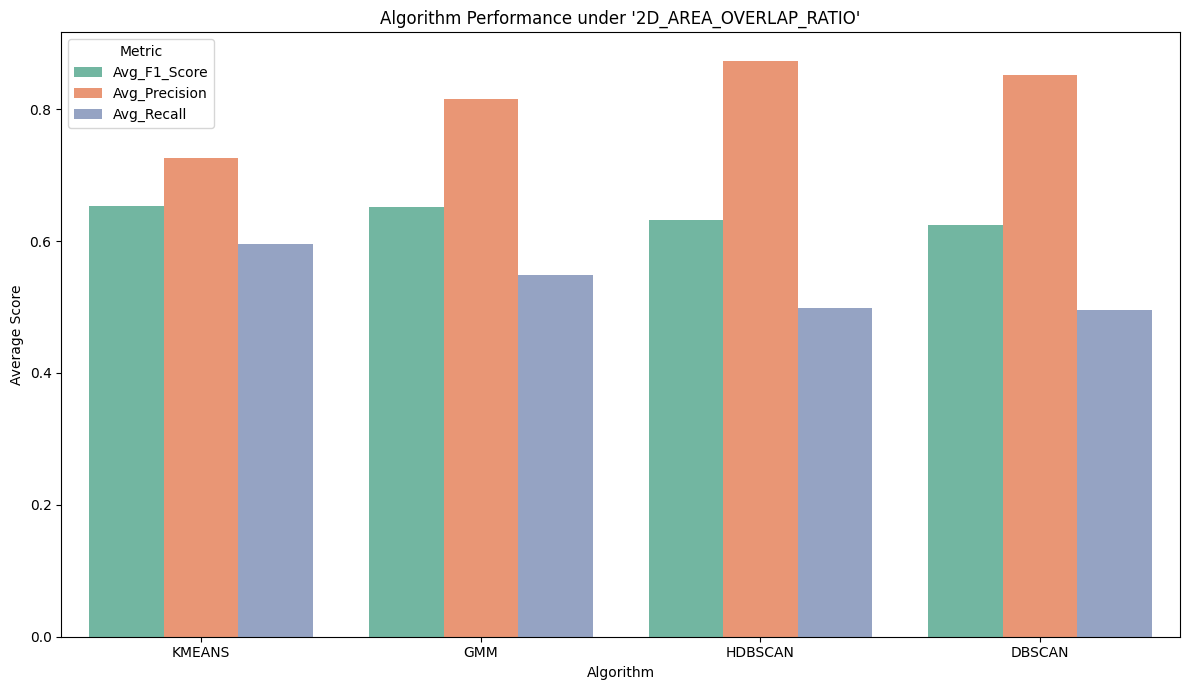

In [32]:
 # 3. 시각화: Algorithm별 성능 비교 (그룹형 막대 차트)
    # 시각화를 위해 GT_Relevant를 제외하고 Algorithm 만으로 그룹화한 데이터를 사용하거나,
    # GT_Relevant 별로 구분해서 표시할 수 있습니다.
    # 여기서는 Algorithm 만으로 그룹화하여 시각화합니다. (위의 algo_performance_simple과 유사)
    
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).reset_index() # Algorithm을 컬럼으로 변경

if not algo_perf_for_plot.empty:
    algo_perf_melted = algo_perf_for_plot.melt(
        id_vars='Algorithm',
        value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
        var_name='Metric',
        value_name='Score'
    )

    plt.figure(figsize=(12, 7))
    # F1-Score가 높은 순으로 알고리즘 정렬
    algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
    sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)
    plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO'")
    plt.xlabel('Algorithm')
    plt.ylabel('Average Score')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
else:
    print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")


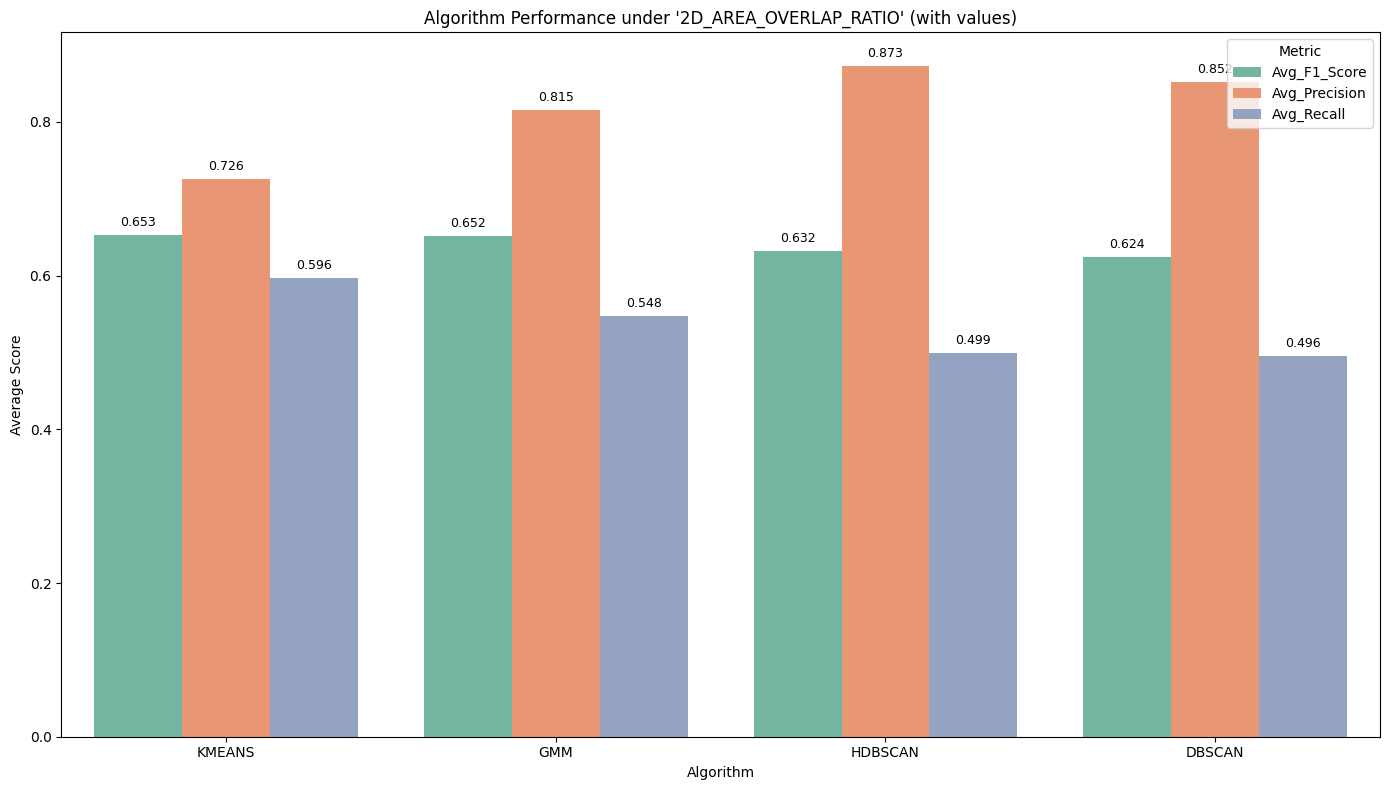

In [33]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df[df['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()

if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
    algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean')
    ).reset_index()

    if not algo_perf_for_plot.empty:
        algo_perf_melted = algo_perf_for_plot.melt(
            id_vars='Algorithm',
            value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
            var_name='Metric',
            value_name='Score'
        )

        plt.figure(figsize=(14, 8)) # 차트 크기 약간 조정
        
        # F1-Score가 높은 순으로 알고리즘 정렬
        algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
        
        # 막대 그래프 생성 및 Axes 객체 저장
        ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)

        # 각 막대 위에 수치 표시하는 부분 추가
        for p in ax.patches:
            # p.get_height()는 막대의 높이 (즉, 값)
            # p.get_x()는 막대의 x축 시작 위치
            # p.get_width()는 막대의 너비
            if p.get_height() > 0: # 높이가 0보다 큰 경우에만 표시 (음수 값 등 예외 처리)
                ax.annotate(f"{p.get_height():.3f}",  # 표시할 텍스트 (소수점 3자리까지)
                            (p.get_x() + p.get_width() / 2., p.get_height()),  # 텍스트 위치 (x, y) - 막대 중앙 상단
                            ha='center', va='center',  # 수평/수직 정렬
                            xytext=(0, 9),  # 텍스트 오프셋 (막대 상단에서 위로 9포인트)
                            textcoords='offset points',
                            fontsize=9) # 폰트 크기

        plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO' (with values)")
        plt.xlabel('Algorithm')
        plt.ylabel('Average Score')
        plt.legend(title='Metric', loc='upper right') # 범례 위치 (필요시 'best' 등으로 자동 조정)
        plt.tight_layout() # 레이아웃 자동 조정
        plt.show()
    else:
        print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")
